#### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow keras

In [2]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0


#### Q2. Load the Wine Quality dataset and explore its dimensions.

In [3]:
import pandas as pd
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


#### Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Convert the target variable to binary labels
wine_df['quality'] = wine_df['quality'].map({'bad': 0, 'good': 1})

In [10]:
wine_df['quality'].unique()

array([0, 1], dtype=int64)

#### Q4. Separate the features and target variables from the dataset.

In [13]:
X = wine_df.iloc[:,:-1]
y = wine_df.iloc[:,-1]

#### Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### Q6. Scale the dataset using an appropriate scaling technique.
no need of scaling

#### Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

#### Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [15]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Q9. Print the summary of the model architecture.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


#### Q10. Set the loss function('binary_crossentropy'), optimizer, and include the accuracy metric in the model.

#### Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Q12. Fit the model to the training data using an appropriate batch size and number of epochs.

In [18]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
32/32 [==============================] - 2s 14ms/step - loss: 1.3328 - accuracy: 0.5445 - val_loss: 0.8330 - val_accuracy: 0.5078
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7076 - accuracy: 0.5973 - val_loss: 0.6649 - val_accuracy: 0.6289
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6759 - accuracy: 0.6373 - val_loss: 0.6628 - val_accuracy: 0.6406
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6683 - accuracy: 0.6422 - val_loss: 0.6636 - val_accuracy: 0.6523
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6649 - accuracy: 0.6471 - val_loss: 0.6613 - val_accuracy: 0.6445
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.6383 - val_loss: 0.6629 - val_accuracy: 0.6406
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.6237 - val_loss: 0.6604 - val_accuracy: 0.6445
Epoch 8/10
32/32 [=

#### Q13. Obtain the model's parameters (weights and biases)

In [22]:
weights, biases = model.layers[0].get_weights()

#### Q14. Store the model's training history as a Pandas DataFrame.

In [23]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))
history_df = pd.DataFrame(history.history)

Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6325 - val_loss: 0.6567 - val_accuracy: 0.6328
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6525 - accuracy: 0.6373 - val_loss: 0.6559 - val_accuracy: 0.6328
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6354 - val_loss: 0.6547 - val_accuracy: 0.6445
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6315 - val_loss: 0.6536 - val_accuracy: 0.6406
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.6334 - val_loss: 0.6528 - val_accuracy: 0.6445
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6483 - accuracy: 0.6393 - val_loss: 0.6501 - val_accuracy: 0.6406
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6466 - accuracy: 0.6432 - val_loss: 0.6496 - val_accuracy: 0.6484
Epoch 8/10
32/32 [==

In [24]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.654410,0.632454,0.656742,0.632812
1,0.652523,0.637341,0.655867,0.632812
2,0.651530,0.635386,0.654720,0.644531
3,0.651137,0.631476,0.653572,0.640625
4,0.648885,0.633431,0.652849,0.644531
5,0.648295,0.639296,0.650063,0.640625
6,0.646559,0.643206,0.649635,0.648438
7,0.645063,0.641251,0.649318,0.648438
8,0.643851,0.644184,0.648296,0.648438
9,0.643504,0.640274,0.655581,0.621094


#### Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

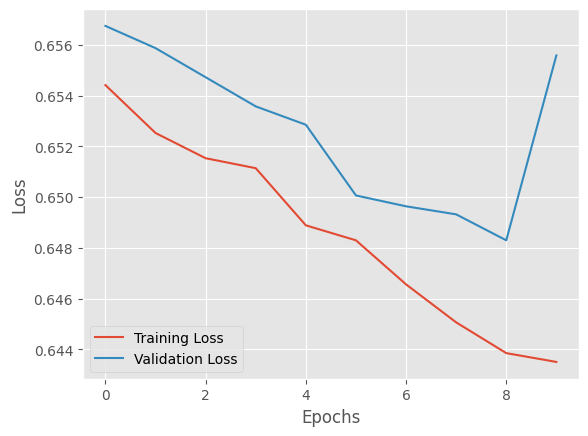

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.6187
Test Loss: 0.6409568786621094
Test Accuracy: 0.6187499761581421
